In [80]:
from typing import List, Dict, Tuple

import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__WORKING_BRANCH_PATH = (
    "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch"
)

hatch = {
    'Vector': '',
    'Skiplist': '\\\\\\\\\\\\',
    'Hashskiplist': '//',
    'Hashlinklist': '----'
}

linestyle = {
    'Vector': '-',
    'Skiplist': '-',
    'Hashskiplist': '-.',
    'Hashlinklist': '..'
}

alpha = {
    'Vector': 1,
    'Skiplist': 0.6,
    'Hashskiplist': 1,
    'Hashlinklist': 0.8
}

color = {
    # 'Vector': 'darkslateblue',
    # 'Skiplist': 'olive',
    # 'Hashskiplist': 'darkred',
    # 'Hashlinklist': 'steelblue'
    # 'Vector': 'black',
    # 'Skiplist': 'black',
    # 'Hashskiplist': 'black',
    # 'Hashlinklist': 'black'
}

edgecolor = {
    'Vector': 'black',
    'Skiplist': 'black',
    'Hashskiplist': 'black',
    'Hashlinklist': 'black'
}

label = {
    'Vector': 'vector',
    'Skiplist': 'skiplist',
    'Hashskiplist': 'hash skiplist',
    'Hashlinklist': 'hash linklist'
}

plt.rcParams["font.family"] = "serif"

alphabets = "abcdefghijklmnopqrstuvwxyz"


In [81]:
color = {
    # 'Vector': 'darkslateblue',
    # 'Skiplist': 'olive',
    # 'Hashskiplist': 'darkred',
    # 'Hashlinklist': 'steelblue'
    # 'Vector': 'black',
    # 'Skiplist': 'black',
    # 'Hashskiplist': 'black',
    # 'Hashlinklist': 'black'
}
    
def get_properties(key: str) -> Dict[str, str]:
    if key.capitalize() in label:
        return {
            # "label": label.get(key.capitalize()),
            "color": color.get(key.capitalize()) or "None",
            "edgecolor": edgecolor.get(key.capitalize()) or "None",
            # "linestyle": linestyle.get(key.capitalize()),
            "hatch": hatch.get(key.capitalize()),
            "alpha": alpha.get(key.capitalize()),
        }
    else:
        raise ValueError(f"Unknown key: {key}")

In [82]:
def get_exp_dirname(query_type: str, selectivity: float, entry_size: int, epp: int) -> str:
    return (
        f"{__WORKING_BRANCH_PATH}/experiments-{query_type}-{selectivity}-{entry_size}-{epp}"
    )


def get_log_file_path(
    query_type: str,
    inserts: int,
    point_queries: int,
    range_queries: int,
    selectivity: float,
    memtable: str,
    entry_size: int,
    number_of_entries_per_page: int,
    number_of_pages: int,
    prefixlen: int = 0,
    bucket_count: int = 0,
    size_ratio: int = 4,
    updates: int = 0,
):
    if memtable.lower() in ("hashskiplist", "hashlinklist"):
        return f"{get_exp_dirname(query_type, selectivity, entry_size, number_of_entries_per_page)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio} l {prefixlen} bucket_count {bucket_count}"
    return f"{get_exp_dirname(query_type, selectivity, entry_size, number_of_entries_per_page)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio}"

In [83]:
def prepare_dataframe(log_file_path: str, key: str="RangeQueryTime: ") -> pd.DataFrame:
    ff = open(log_file_path, "r")
    range_quereis = []

    for line in ff.readlines():
        if key in line:
            range_quereis.append(float(line.split(" ")[1]))
    
    return pd.DataFrame(range_quereis, columns=["TimeTaken"])


In [84]:
def get_times(log_file, key="InsertTime: "):

    result_list = list()

    for line in open(log_file, 'r').readlines():
        if line.startswith(key):
            result_list.append(int(line.split(' ')[1]))

    return result_list

In [85]:
import io

entry_size = 64
memtables = ["Vector", "Skiplist", "HashSkiplist", "HashLinklist"]
number_of_entries_per_page = 64
number_of_pages = 4096
updates = 0

inserts = 120000
updates = 0

prefix_len = 4
bucket_counts = 10000
srange = 0.0001
lrange = 0.8

vec_only_inserts = get_log_file_path(
    "Only-Inserts-Vec-Def",
    inserts,
    0, # point_queries,
    0, # range_queries,
    0, # selectivity,
    memtables[0],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

skip_only_inserts = get_log_file_path(
    "Only-Inserts-Vec-Def",
    inserts,
    0, # point_queries,
    0, # range_queries,
    0, # selectivity,
    memtables[1],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_skip_list_only_inserts_4_100000 = get_log_file_path(
    "Only-Inserts-Vec-Def",
    inserts,
    0, # point_queries,
    0, # range_queries,
    0, # selectivity,
    memtables[2],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_link_list_only_inserts_4_100000 = get_log_file_path(
    "Only-Inserts-Vec-Def",
    inserts,
    0, # point_queries,
    0, # range_queries,
    0, # selectivity,
    memtables[3],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

# ============ Point Queries ============

vec_inserts_pq = get_log_file_path(
    "Interleaved-PQ",
    inserts,
    2400,
    0, # range_queries,
    0, # selectivity,
    memtables[0],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

skip_inserts_pq = get_log_file_path(
    "Interleaved-PQ",
    inserts,
    2400,
    0, # range_queries,
    0, # selectivity,
    memtables[1],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_skip_inserts_pq_4_100000 = get_log_file_path(
    "Interleaved-PQ",
    inserts,
    2400,
    0, # range_queries,
    0, # selectivity,
    memtables[2],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_link_inserts_pq_4_100000 = get_log_file_path(
    "Interleaved-PQ",
    inserts,
    2400,
    0, # range_queries,
    0, # selectivity,
    memtables[3],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

# ============ Range Queries ============

vec_small_range = get_log_file_path(
    "RQ-small",
    inserts,
    0, # point_queries,
    2400,
    srange,
    memtables[0],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

skip_small_range = get_log_file_path(
    "RQ-small",
    inserts,
    0, # point_queries,
    2400,
    srange,
    memtables[1],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)   

hash_skip_list_small_range_4_100000 = get_log_file_path(
    "RQ-small",
    inserts,
    0, # point_queries,
    2400,
    srange,
    memtables[2],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_link_list_small_range_4_100000 = get_log_file_path(
    "RQ-small",
    inserts,
    0, # point_queries,
    2400,
    srange,
    memtables[3],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

# ============ Large Range Queries ============

vec_small_large = get_log_file_path(
    "RQ-large",
    inserts,
    0, # point_queries,
    2400,
    lrange,
    memtables[0],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

skip_small_large = get_log_file_path(
    "RQ-large",
    inserts,
    0, # point_queries,
    2400,
    lrange,
    memtables[1],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)   

hash_skip_list_large_range_4_100000 = get_log_file_path(
    "RQ-large",
    inserts,
    0, # point_queries,
    2400,
    lrange,
    memtables[2],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

hash_link_list_large_range_4_100000 = get_log_file_path(
    "RQ-large",
    inserts,
    0, # point_queries,
    2400,
    lrange,
    memtables[3],
    entry_size,
    number_of_entries_per_page,
    number_of_pages,
    prefixlen=prefix_len,
    bucket_count=bucket_counts,
    size_ratio=4,
    updates=updates,
)

vec_insert_time = get_times(vec_only_inserts+"/workload.log", key="InsertTime: ")
skip_insert_time = get_times(skip_only_inserts+"/workload.log", key="InsertTime: ")
hash_skip_insert_time = get_times(hash_skip_list_only_inserts_4_100000+"/workload.log", key="InsertTime: ")
hash_link_insert_time = get_times(hash_link_list_only_inserts_4_100000+"/workload.log", key="InsertTime: ")

vec_pq_time = get_times(vec_inserts_pq+"/workload.log", key="PointQueryTime: ")
skip_pq_time = get_times(skip_inserts_pq+"/workload.log", key="PointQueryTime: ")
hash_skip_pq_time = get_times(hash_skip_inserts_pq_4_100000+"/workload.log", key="PointQueryTime: ")
hash_link_pq_time = get_times(hash_link_inserts_pq_4_100000+"/workload.log", key="PointQueryTime: ")

vec_range_time = get_times(vec_small_range+"/workload.log", key="RangeQueryTime: ")
skip_range_time = get_times(skip_small_range+"/workload.log", key="RangeQueryTime: ")
hash_skip_range_time = get_times(hash_skip_list_small_range_4_100000+"/workload.log", key="RangeQueryTime: ")
hash_link_range_time = get_times(hash_link_list_small_range_4_100000+"/workload.log", key="RangeQueryTime: ")

vec_lrange_time = get_times(vec_small_large+"/workload.log", key="RangeQueryTime: ")
skip_lrange_time = get_times(skip_small_large+"/workload.log", key="RangeQueryTime: ")
hash_skip_lrange_time = get_times(hash_skip_list_large_range_4_100000+"/workload.log", key="RangeQueryTime: ")
hash_link_lrange_time = get_times(hash_link_list_large_range_4_100000+"/workload.log", key="RangeQueryTime: ")



In [86]:
# /home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQ-large-0.8-64-64/I 120000 U 0 S 2400 Y 0.8 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 4 bucket_count 10000/workload.log
# avg_time_insert = {
#     'Vector': sum(vec_insert_time)/len(vec_insert_time),
#     'Skip': sum(skip_insert_time)/len(skip_insert_time),
#     'HashSkipList': sum(hash_skip_insert_time)/len(hash_skip_insert_time),
#     'HashLinkList': sum(hash_link_insert_time)/len(hash_link_insert_time)
# }

avg_time_insert = {
    'Vector': sum(vec_insert_time)/len(vec_insert_time),
    'Skip': sum(skip_insert_time)/len(skip_insert_time),
    'HashSkipList': sum(hash_skip_insert_time)/len(hash_skip_insert_time),
    'HashLinkList': sum(hash_link_insert_time)/len(hash_link_insert_time)
}

In [87]:
# avg_time_pq = {
#     'Vector': sum(vec_pq_time)/len(vec_pq_time),
#     'Skip': sum(skip_pq_time)/len(skip_pq_time),
#     'HashSkipList': sum(hash_skip_pq_time)/len(hash_skip_pq_time),
#     'HashLinkList': sum(hash_link_pq_time)/len(hash_link_pq_time)
# }

avg_time_pq = {
    'Vector': sum(vec_pq_time)/len(vec_pq_time),
    'Skip': sum(skip_pq_time)/len(skip_pq_time),
    'HashSkipList': sum(hash_skip_pq_time)/len(hash_skip_pq_time),
    'HashLinkList': sum(hash_link_pq_time)/len(hash_link_pq_time)
}

In [88]:
# avg_time_range = {
#     'Vector': sum(vec_range_time)/len(vec_range_time),
#     'Skip': sum(skip_range_time)/len(skip_range_time),
#     'HashSkipList': sum(hash_skip_range_time)/len(hash_skip_range_time),
#     'HashLinkList': sum(hash_link_range_time)/len(hash_link_range_time)
# }

avg_time_range = {
    'Vector': sum(vec_range_time)/len(vec_range_time),
    'Skip': sum(skip_range_time)/len(skip_range_time),
    'HashSkipList': sum(hash_skip_range_time)/len(hash_skip_range_time),
    'HashLinkList': sum(hash_link_range_time)/len(hash_link_range_time)
}

In [89]:
# avg_time_lrange = {
#     'Vector': sum(vec_lrange_time)/len(vec_lrange_time),
#     'Skip': sum(skip_lrange_time)/len(skip_lrange_time),
#     'HashSkipList': sum(hash_skip_lrange_time)/len(hash_skip_lrange_time),
#     'HashLinkList': sum(hash_link_lrange_time)/len(hash_link_lrange_time)
# }

avg_time_lrange = {
    'Vector': sum(vec_lrange_time)/len(vec_lrange_time),
    'Skip': sum(skip_lrange_time)/len(skip_lrange_time),
    'HashSkipList': sum(hash_skip_lrange_time)/len(hash_skip_lrange_time),
    'HashLinkList': sum(hash_link_lrange_time)/len(hash_link_lrange_time)
}

In [90]:
def annotate_label(ax, recta, reactb, text=""):
    for rect1, rect2 in zip(recta, reactb):
        height = max(rect1.get_height(), rect2.get_height())
        ax.annotate("}" + f"{text}",
                    xy=(rect1.get_x() + rect1.get_width() / 2, height),
                    xytext=(8, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


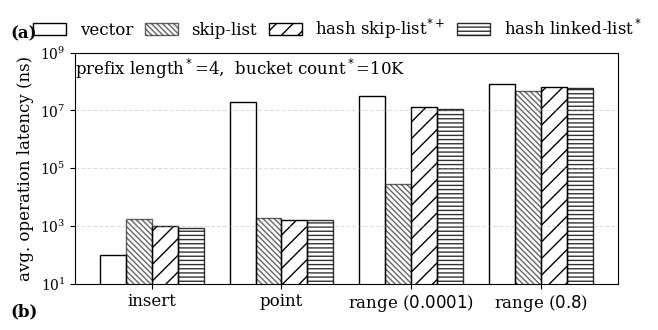

In [91]:
FIGSIZE = (7, 3)


fig, ax = plt.subplots(figsize=FIGSIZE)

width = 0.2

ax.bar(
    0 - 0.3,
    avg_time_insert["Vector"],
    width,
    label="vector",
    **get_properties("Vector"),
)
ax.bar(
    0 - 0.1,
    avg_time_insert["Skip"],
    width,
    label="skip-list",
    **get_properties("Skiplist"),
)
rect1 = ax.bar(
    0 + 0.1,
    avg_time_insert["HashSkipList"],
    width,
    label="hash skip-list$^{*+}$",
    **get_properties("HashSkipList"),
)
rect2 = ax.bar(
    0 + 0.3,
    avg_time_insert["HashLinkList"],
    width,
    label="hash linked-list$^*$",
    **get_properties("HashLinkList"),
)

# annotate_label(ax, rect1, rect2, f"  l {l}, bck {bck}")

ax.bar(
    1 - 0.3,
    avg_time_pq["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    1 - 0.1,
    avg_time_pq["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect3 = ax.bar(
    1 + 0.1,
    avg_time_pq["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect4 = ax.bar(
    1 + 0.3,
    avg_time_pq["HashLinkList"],
    width,
    **get_properties("Hashlinklist"),
)

# annotate_label(ax, rect3, rect4, f"  l {l}, bck {bck}")

ax.bar(
    2 - 0.3,
    avg_time_range["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    2 - 0.1,
    avg_time_range["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect5 = ax.bar(
    2 + 0.1,
    avg_time_range["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect6 = ax.bar(
    2 + 0.3,
    avg_time_range["HashLinkList"],
    width,
    **get_properties("HashLinkList"),
)

# annotate_label(ax, rect5, rect6, f"  l {l}, bck {bck}")

ax.bar(
    3 - 0.3,
    avg_time_lrange["Vector"],
    width,
    **get_properties("Vector"),
)
ax.bar(
    3 - 0.1,
    avg_time_lrange["Skip"],
    width,
    **get_properties("Skiplist"),
)
rect7 = ax.bar(
    3 + 0.1,
    avg_time_lrange["HashSkipList"],
    width,
    **get_properties("HashSkipList"),
)
rect8 = ax.bar(
    3 + 0.3,
    avg_time_lrange["HashLinkList"],
    width,
    **get_properties("HashLinkList"),
)


xticks = [i for i in range(4)]
ax.set_xticks(xticks)
ax.set_xticklabels(["insert", "point", r"range ($0.0001$)", r"range ($0.8$)"], fontsize=12)

ax.set_ylabel("avg. operation latency (ns)", fontsize=12)

ax.set_ylim(bottom=(10**1), top=(10**9))
# ax.set_title(f"l {l}, bck {bck}", fontsize=12)

fig.legend(loc='upper center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.7)
ax.set_yscale("log")
ax.text(x=0.61, y=0.93, s=f'prefix length$^*$={prefix_len},  bucket count$^*$={bucket_counts//1000}K', fontsize=12,
        horizontalalignment='right', 
        verticalalignment='center', 
        transform=ax.transAxes)
ax.text(x=-0.12, y=1.06, s='(a)', fontsize=12,
        horizontalalignment='left', 
        transform=ax.transAxes, fontweight='bold')

ax.text(x=-0.12, y=-0.14, s='(b)', fontsize=12,
        horizontalalignment='left', 
        transform=ax.transAxes, fontweight='bold')

# grid = True
ax.grid(axis="y", linestyle="--", alpha=0.4)
# plt.tight_layout()
plt.savefig("motivation1.eps", format="eps", bbox_inches="tight", dpi=1200)
plt.show()


In [92]:
avg_time_pq["Vector"]

18806378.379166666

In [93]:
avg_time_insert["Vector"]

99.9924917292356

<br><br><br><br><br><br><br><br><br><br><br><br>

In [94]:
linestyle = {
    'Insert': '--',
    'Point': '-',
    'Srange': '-.',
    'Lrange': ':'
}
color = {
    'Vector': 'black',
    'Skiplist': 'black',
    'Hashskiplist': 'black',
    'Hashlinklist': 'black'
}

def get_properties(key: str, type_: str) -> Dict[str, str]:
    if key.capitalize() in label:
        return {
            # "label": label.get(key.capitalize()),
            "color": color.get(key.capitalize()) or "None",
            # "edgecolor": edgecolor.get(key.capitalize()) or "None",
            "linestyle": linestyle.get(type_.capitalize()),
            # "hatch": hatch.get(key.capitalize()),
            # "alpha": alpha.get(key.capitalize()),
        }
    else:
        raise ValueError(f"Unknown key: {key}")

In [95]:
def get_exp_dirname(query_type: str, selectivity: float, entry_size: int, epp: int) -> str:
    return (
        f"{__WORKING_BRANCH_PATH}/experiments-{query_type}-{selectivity}-{entry_size}-{epp}"
    )


def get_log_dirname(
    query_type: str,
    inserts: int,
    point_queries: int,
    range_queries: int,
    selectivity: float,
    memtable: str,
    entry_size: int,
    number_of_entries_per_page: int,
    number_of_pages: int,
    prefixlen: int = 0,
    bucket_count: int = 0,
    size_ratio: int = 4,
    updates: int = 0,
):
    if memtable.lower() in ("hashskiplist", "hashlinklist"):
        return f"{get_exp_dirname(query_type, selectivity, entry_size,number_of_entries_per_page)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio} l {prefixlen} bucket_count {bucket_count}"
    return f"{get_exp_dirname(query_type, selectivity, entry_size, number_of_entries_per_page)}/I {inserts} U {updates} S {range_queries} Y {selectivity} Q {point_queries} m {memtable.lower()} E {entry_size} B {number_of_entries_per_page} P {number_of_pages} T {size_ratio}"

In [96]:
def prepare_dataframe(log_file_path: str, key: str="RangeQueryTime: ") -> pd.DataFrame:
    ff = open(log_file_path, "r")
    range_quereis = []

    for line in ff.readlines():
        if key in line:
            range_quereis.append(float(line.split(" ")[1]))
    
    df = pd.DataFrame(range_quereis, columns=["TimeTaken"])
    df["TimeTaken"] = df["TimeTaken"]
    return df


In [97]:
query_type = "MOTIVATION"
# prefix_lengths = [2, 4, 6, 8, 10]
prefix_lengths = [2, 4, 6, 8]
# bucket_counts = [100, 1000, 5000, 10000, 25000, 65536, 100000]
b_counts = [1000, 10000, 50000, 100000]

entry_size = 64
memtables = ["Vector", "SkipList", "Hashskiplist", "Hashlinklist"]
inserts = 120000
point_queries = 0
range_queries = 0
number_of_entries_per_page = 64
number_of_pages = 4096
updates = 0
sselectivity = 0.0001
lselectivity = 0.8

In [98]:
# hsloi_2_1000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 1000/workload.log"
# hsloi_2_10000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 10000/workload.log"
# hsloi_2_50000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 50000/workload.log"
# hsloi_2_100000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 100000/workload.log"
# hsloid_2_1000000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 1000000/workload.log"


# hsloi_4_1000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-Only-Inserts-Vec-Def-0-64-64/I 120000 U 0 S 0 Y 0 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 4 bucket_count 1000/workload.log"
# hsloi_4_10000

hash_skip_list_only_inserts = list()
hash_skip_list_insert_points = list()
hash_skip_list_srange_queries = list()
hash_skip_list_lrange_queries = list()


only_inserts = "Only-Inserts-Vec-Def"

for prefixlen in prefix_lengths:
    for bucket_count in b_counts:
        log_file = get_log_dirname(
            only_inserts,
            120000,
            0,
            0,
            0,
            memtables[2],
            entry_size,
            number_of_entries_per_page,
            number_of_pages,
            prefixlen=prefixlen,
            bucket_count=bucket_count,
            size_ratio=4,
            updates=updates,
        )
        hash_skip_list_only_inserts.append({
                "df": prepare_dataframe(log_file+"/workload.log", key="InsertTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_count,
                "memtable": memtables[2]
            })


only_inserts = "Interleaved-PQ"

for prefixlen in prefix_lengths:
    for bucket_count in b_counts:
        log_file = get_log_dirname(
            only_inserts,
            120000,
            2400,
            0,
            0,
            memtables[2],
            entry_size,
            number_of_entries_per_page,
            number_of_pages,
            prefixlen=prefixlen,
            bucket_count=bucket_count,
            size_ratio=4,
            updates=updates,
        )
        hash_skip_list_insert_points.append({
                "df": prepare_dataframe(log_file+"/workload.log", key="PointQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_count,
                "memtable": memtables[2]
            })



In [99]:
only_inserts = "RQ-small"

for prefixlen in prefix_lengths:
    for bucket_count in b_counts:
        log_file = get_log_dirname(
            only_inserts,
            120000,
            0,
            2400,
            0.0001,
            memtables[2],
            entry_size,
            number_of_entries_per_page,
            number_of_pages,
            prefixlen=prefixlen,
            bucket_count=bucket_count,
            size_ratio=4,
            updates=updates,
        )
        hash_skip_list_srange_queries.append({
                "df": prepare_dataframe(log_file+"/workload.log", key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_count,
                "memtable": memtables[2]
            })


In [100]:
only_inserts = "RQ-large"

for prefixlen in prefix_lengths:
    for bucket_count in b_counts:
        log_file = get_log_dirname(
            only_inserts,
            120000,
            0,
            2400,
            0.8,
            memtables[2],
            entry_size,
            number_of_entries_per_page,
            number_of_pages,
            prefixlen=prefixlen,
            bucket_count=bucket_count,
            size_ratio=4,
            updates=updates,
        )
        hash_skip_list_lrange_queries.append({
                "df": prepare_dataframe(log_file+"/workload.log", key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_count,
                "memtable": memtables[2]
            })


In [101]:
inserts_df = list()
point_queries_df = list()
srange_queries_df = list()
lrange_queries_df = list()

for prefixlen in prefix_lengths:
    for bucket_counts in b_counts:
        for memtable in memtables:
            log_dir = get_log_dirname(
                query_type,
                inserts,
                point_queries,
                range_queries,
                sselectivity,
                memtable,
                entry_size,
                number_of_entries_per_page,
                number_of_pages,
                prefixlen=prefixlen,
                bucket_count=bucket_counts,
                updates=updates,
            )

            lrange_log_dir = get_log_dirname(
                query_type,
                inserts,
                point_queries,
                range_queries,
                lselectivity,
                memtable,
                entry_size,
                number_of_entries_per_page,
                number_of_pages,
                prefixlen=prefixlen,
                bucket_count=bucket_counts,
                updates=updates,
            )

            log_file = f"{log_dir}/workload.log"
            # lrange_queries_log_file = f"{log_dir}/workload.log"

            inserts_df.append({
                "df": prepare_dataframe(log_file, key="InsertTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_counts,
                "memtable": memtable
            })

            point_queries_df.append({
                "df": prepare_dataframe(log_file, key="PointQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_counts,
                "memtable": memtable
            })

            srange_queries_df.append({
                "df": prepare_dataframe(log_file, key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_counts,
                "memtable": memtable
            })

            lrange_queries_df.append({
                "df": prepare_dataframe(f"{lrange_log_dir}/workload.log", key="RangeQueryTime: "),
                "prefixLen": prefixlen,
                "bucketCount": bucket_counts,
                "memtable": memtable
            })


FileNotFoundError: [Errno 2] No such file or directory: '/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-MOTIVATION-0.0001-64-64/I 120000 U 0 S 0 Y 0.0001 Q 0 m vector E 64 B 64 P 4096 T 4/workload.log'

hash_skip_list_only_inserts = list()
hash_skip_list_insert_points = list()
hash_skip_list_srange_queries = list()
hash_skip_list_lrange_queries = list()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


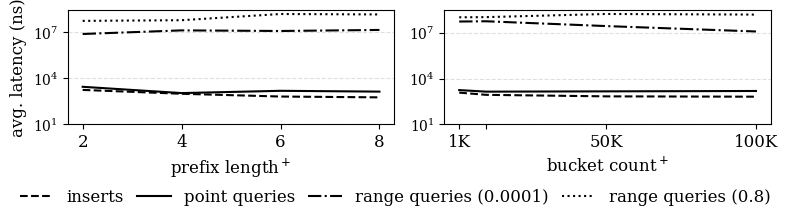

In [ ]:
bucket_count = 100000

phash_skip_list_inserts = [df for df in hash_skip_list_only_inserts if df["bucketCount"] == bucket_count]
phash_skip_list_point_queries = [df for df in hash_skip_list_insert_points if df["bucketCount"] == bucket_count]
phash_skip_list_srange_queries = [df for df in hash_skip_list_srange_queries if df["bucketCount"] == bucket_count]
phash_skip_list_lrange_queries = [df for df in hash_skip_list_lrange_queries if df["bucketCount"] == bucket_count]

FIGSIZE = (8, 2)
pprefixes = [df["prefixLen"] for df in phash_skip_list_inserts]
pinserts_time = [df["df"].mean() for df in phash_skip_list_inserts]
ppq_time = [df["df"].mean() for df in phash_skip_list_point_queries]
psrange_time = [df["df"].mean() for df in phash_skip_list_srange_queries]
plrange_time = [df["df"].mean() for df in phash_skip_list_lrange_queries]

fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

ax[0].plot(
    pprefixes,
    pinserts_time,
    label = "inserts",
    **get_properties("Hashskiplist", "insert"),
)

ax[0].plot(
    pprefixes,
    ppq_time,
    label = "point queries",
    **get_properties("Hashskiplist", "point"),
)

ax[0].plot(
    pprefixes,
    psrange_time,
    label = "range queries (0.0001)",
    **get_properties("Hashskiplist", "srange"),
)

ax[0].plot(
    pprefixes,
    plrange_time,
    label = "range queries (0.8)",
    **get_properties("Hashskiplist", "lrange"),
)

ax[0].set_xlabel("prefix length$^+$", fontsize=12)
# ax[0].set_ylabel("avg operation latency (${\mu}s)$")

ax[0].set_yscale("log")
ax[0].set_xticks(pprefixes)
ax[0].set_xticklabels(pprefixes, fontsize=12)
# ax[0].set_title(f"bucket count {bucket_count}")
ax[0].grid(axis="y", linestyle="--", alpha=0.4)
ax[0].set_ylim(bottom=10**1)
# ax[0].legend()

# ========================================

prefix = 6

buckets = b_counts

hash_skip_list_inserts = [df for df in hash_skip_list_only_inserts if df["prefixLen"] == prefix and df["bucketCount"] in buckets]
hash_skip_list_point_queries = [df for df in hash_skip_list_insert_points if df["prefixLen"] == prefix and df["bucketCount"] in buckets]
bbhash_skip_list_srange_queries = [df for df in hash_skip_list_srange_queries if df["prefixLen"] == prefix and df["bucketCount"] in buckets]
bbhash_skip_list_lrange_queries = [df for df in hash_skip_list_lrange_queries if df["prefixLen"] == prefix and df["bucketCount"] in buckets]


# FIGSIZE = (4, 3)
buckets = [df["bucketCount"] for df in hash_skip_list_inserts]
inserts_time = [df["df"].mean() for df in hash_skip_list_inserts]
pq_time = [df["df"].mean() for df in hash_skip_list_point_queries]
srange_time = [df["df"].mean() for df in bbhash_skip_list_srange_queries]
lrange_time = [df["df"].mean() for df in bbhash_skip_list_lrange_queries]

ax[1].plot(
    buckets,
    inserts_time,
    # label = "inserts",
    **get_properties("Hashskiplist", "insert"),
)

ax[1].plot(
    buckets,
    pq_time,
    # label = "point queries",
    **get_properties("Hashskiplist", "point"),
)

ax[1].plot(
    buckets,
    srange_time,
    # label = "range queries",
    **get_properties("Hashskiplist", "srange"),
)

ax[1].plot(
    buckets,
    lrange_time,
    **get_properties("Hashskiplist", "lrange"),
)

ax[1].set_xlabel("bucket count$^+$", fontsize=12)
ax[0].set_ylabel("avg. latency (ns)", fontsize=12)

ax[1].set_yscale("log")
ax[1].set_xticks(buckets)
# ax[1].set_xticklabels([ bb if bb < 50000 else f"{bb//1000}K" for bb in buckets], fontsize=12)
ax[1].set_xticklabels(['1K', '', '50K', '100K'], fontsize=12)
ax[1].set_ylim(bottom=10**1)
# ax[1].set_title(f"bucket count {bucket_count}")
ax[1].grid(axis="y", linestyle="--", alpha=0.4)

# ax[0].text(x=-0.18, y=-0.2, s='(b)', fontsize=10,
#         horizontalalignment='left', 
#         transform=ax[0].transAxes, fontweight='bold')

fig.legend(loc="center", ncol=4, fontsize=12, bbox_to_anchor=(0.5, -0.01), frameon=False, columnspacing=0.8)
plt.tight_layout()

plt.savefig("motivation2.eps", format="eps", bbox_inches="tight", dpi=1200)

In [ ]:
buckets

[1000, 10000, 50000, 100000]

In [ ]:
hash_skip_list_srange_queries

[]